<a href="https://colab.research.google.com/github/dst3v3n/Modelos-AI/blob/main/Analisis_de_datos_HACKATHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis de datos para entrenar los modelos de ML**
### HACKATON TALENTOTECH COHORTE 4, 25 DE AGOSTO ARQUITECTURA EN LA NUBE


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Configuración para visualización
sns.set(style="whitegrid")

In [3]:
dataframe = pd.read_csv(r"datos_limpioscsv.csv")
dataframe.head()

,nacimiento,genero,industria,sector,nucleo,em_fom_remoto,em_fom_camb_remoto,t_dez_remoto,t_casa,t_familia,t_remoto_3meses,t_pref_remoto_3meses,h_trabajo_remoto
0,1976,1,13,31,1,2,2,0.0,1.0,7.0,0.5,0.8,8.0
1,1971,1,5,31,2,1,1,0.0,4.0,4.0,0.1,0.5,10.0
2,1974,1,8,25,1,2,2,0.0,3.0,4.0,1.0,1.0,9.0
3,1985,1,11,37,1,1,1,2.0,4.0,2.0,0.5,0.4,8.0
4,1992,2,2,2,2,2,2,0.5,0.5,5.0,1.0,1.0,9.0


### Analisis Exploratorio de Datos

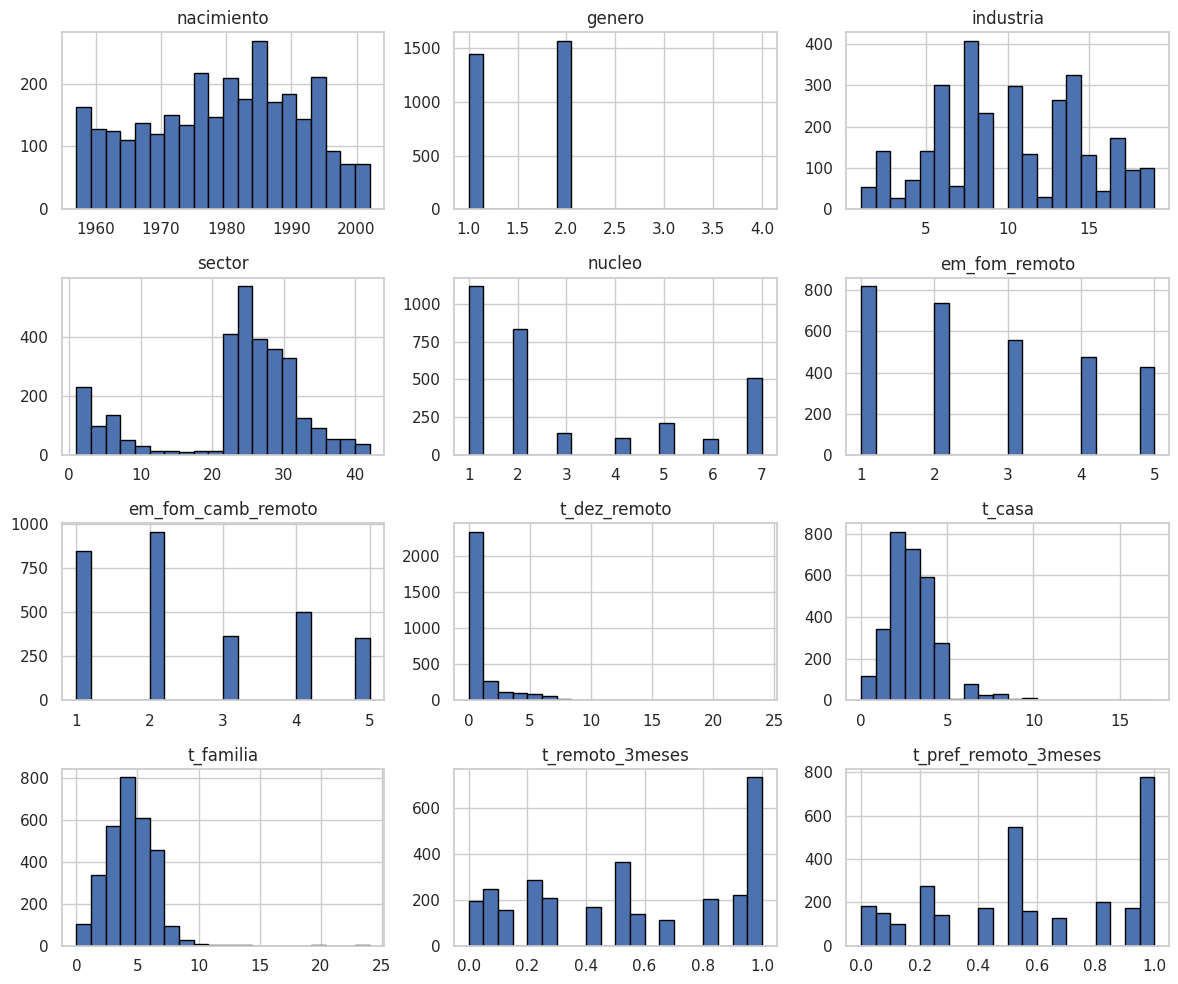

In [14]:
# Elimina la columna 'h_trabajo_remoto' y crea histogramas para las demás columnas
dataframe.drop(['h_trabajo_remoto'], axis=1).hist(figsize=(12, 10), bins=20, edgecolor='black')

# Ajusta el espaciado entre los subgráficos para evitar la superposición de títulos
plt.tight_layout()

# Muestra la gráfica
plt.show()

In [4]:
dataframe.describe()

,nacimiento,genero,industria,sector,nucleo,em_fom_remoto,em_fom_camb_remoto,t_dez_remoto,t_casa,t_familia,t_remoto_3meses,t_pref_remoto_3meses,h_trabajo_remoto
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,1979.226190,1.525132,10.238757,23.258598,2.930556,2.652778,2.520503,1.159491,2.990146,4.315331,0.546065,0.576819,8.094378
std,11.834749,0.507336,4.566762,9.769080,2.245841,1.389605,1.356516,1.939592,1.597539,1.926649,0.361365,0.342139,2.126818
min,1957.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.000000,1.000000,7.000000,22.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.200000,0.300000,7.000000
50%,1980.000000,2.000000,10.000000,25.000000,2.000000,2.000000,2.000000,0.500000,3.000000,4.000000,0.500000,0.500000,8.000000
75%,1989.000000,2.000000,14.000000,29.000000,5.000000,4.000000,4.000000,1.000000,4.000000,5.000000,0.900000,1.000000,9.000000
max,2002.000000,4.000000,19.000000,42.000000,7.000000,5.000000,5.000000,24.000000,17.000000,24.000000,1.000000,1.000000,24.000000


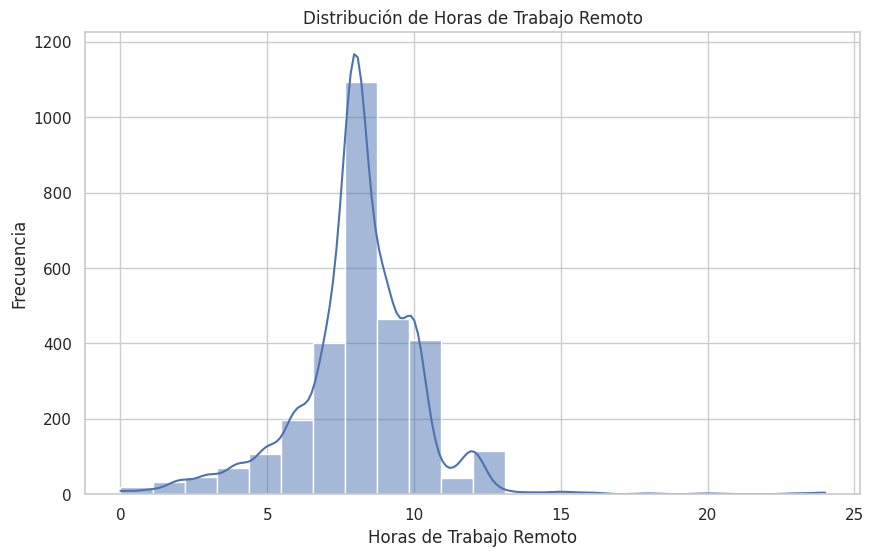

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['h_trabajo_remoto'], bins=22, kde=True)
plt.title('Distribución de Horas de Trabajo Remoto')
plt.xlabel('Horas de Trabajo Remoto')
plt.ylabel('Frecuencia')
plt.show()

### Matriz de correlacion

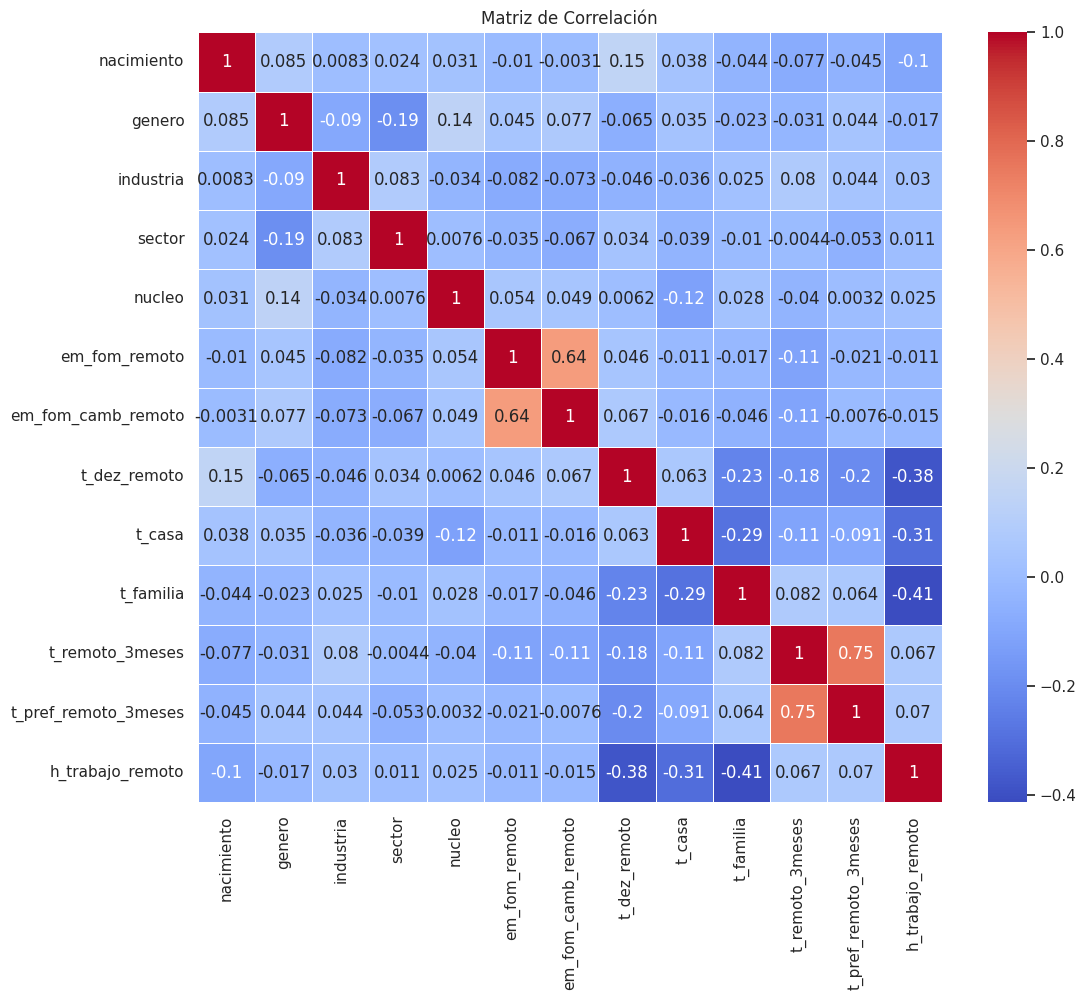

In [15]:
plt.figure(figsize=(12, 10))
correlation_matrix = dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


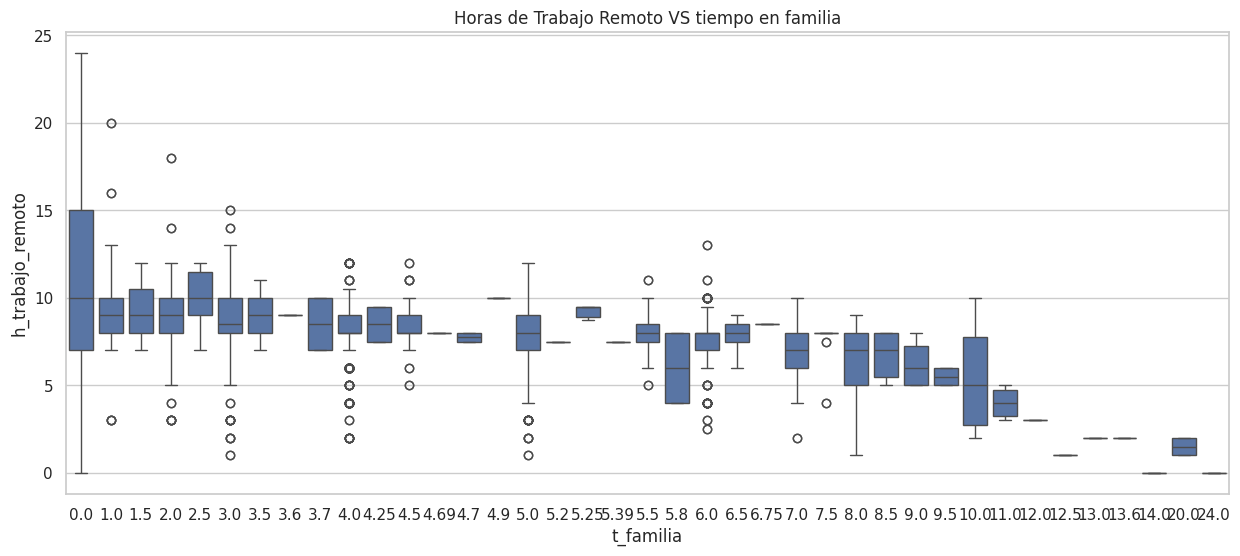

In [58]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='t_familia', y='h_trabajo_remoto', data=dataframe)
plt.title('Horas de Trabajo Remoto VS tiempo en familia')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


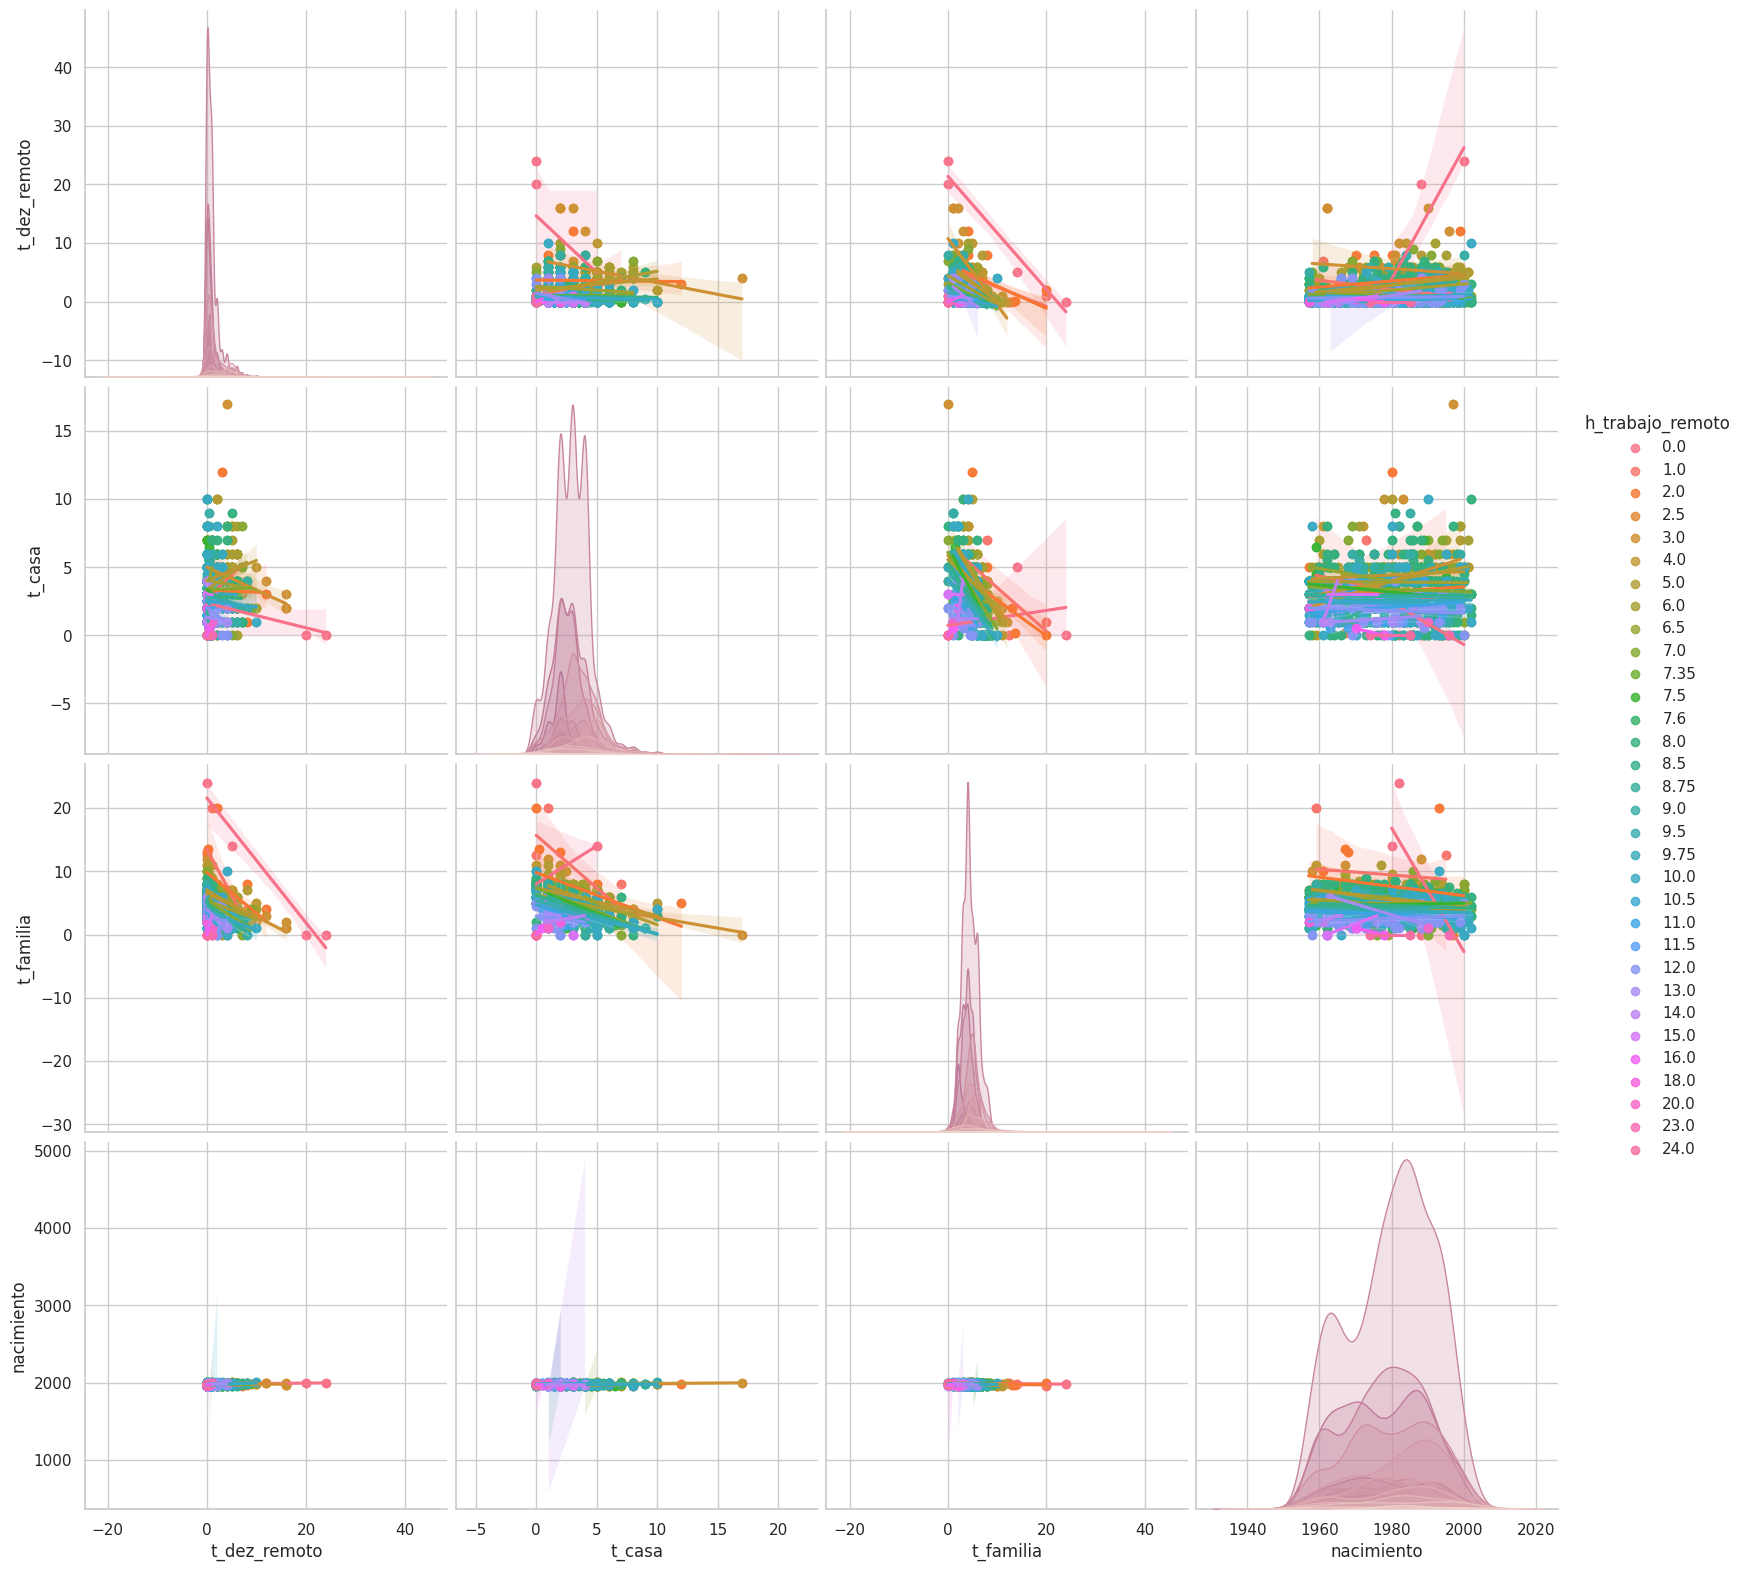

In [19]:
sb.pairplot(dataframe.dropna(), hue='h_trabajo_remoto',size=4,vars=["t_dez_remoto", "t_casa","t_familia","nacimiento"],kind='reg')

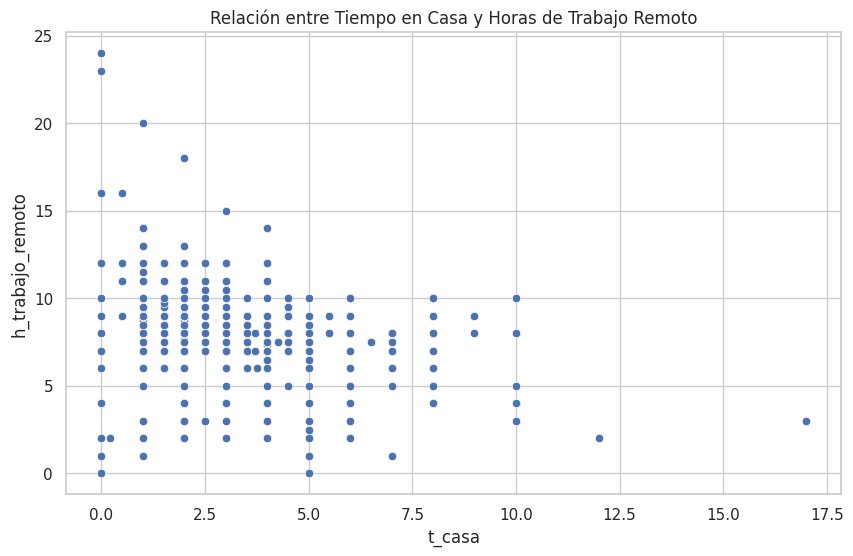

In [21]:
# Scatter plot para ver la relación entre dos variables numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t_casa', y='h_trabajo_remoto', data=dataframe)
plt.title('Relación entre Tiempo en Casa y Horas de Trabajo Remoto')
plt.show()



**Valores de Referencia a partir de las observaciones**

In [ ]:
datos_ref = [[1989, 2, 14, 29, 5, 4, 1, 3, 4.3, 0.8, 8]]

# **Descategorizacion para grafico radar y tablas**

In [95]:

datos_ref = [[1989, 2, 14, 29, 5, 4, 1, 3, 4.3, 0.8, 8]]

# Descategorizacion:
# Diccionarios de categorías y códigos
genero_dict = {1: 'M', 2: 'F', 3: 'Prefiero no decirlo', 4: 'otro'}
nucleo_dict = {
    1: 'Couple with dependent children',
    2: 'Couple with no dependent children',
    3: 'Group household',
    4: 'Multiple family household',
    5: 'One parent family with dependent children',
    6: 'Other one family household',
    7: 'Single person'
}
em_fom_camb_remoto_dict = {
    1: 'Neither unlikely or likely',
    2: 'Somewhat likely',
    3: 'Somewhat unlikely',
    4: 'Very likely',
    5: 'Very unlikely'
}
industria_dict = {
    1: 'Accommodation and food',
    2: 'Administrative and Support',
    3: 'Agriculture, forestry and fishing',
    4: 'Arts and recreation',
    5: 'Construction',
    6: 'Education and training',
    7: 'Electricity, gas, water and waste',
    8: 'Financial and Insurance',
    9: 'Health Care and Social Assistance',
    10: 'Information Media and Telecommunications',
    11: 'Manufacturing',
    12: 'Mining',
    13: 'Other Services',
    14: 'Professional, Scientific and Technical',
    15: 'Public Administration and Safety',
    16: 'Rental, Hiring and Real Estate',
    17: 'Retail Trade',
    18: 'Transport, Postal and Warehousing',
    19: 'Wholesale Trade'
}
sector_dict = {
    1: 'Clerical and administrative workers - Clerical and Office Support Workers',
    2: 'Clerical and administrative workers - General Clerical Workers',
    3: 'Clerical and administrative workers - Inquiry Clerks and Receptionists',
    4: 'Clerical and administrative workers - Numerical Clerks',
    5: 'Clerical and administrative workers - Office Managers and Program Administrators',
    6: 'Clerical and administrative workers - Other Clerical and Administrative Workers',
    7: 'Clerical and administrative workers - Personal Assistants and Secretaries',
    8: 'Community and personal service workers - Carers and Aides',
    9: 'Community and personal service workers - Health and Welfare Support Workers',
    10: 'Community and personal service workers - Hospitality Workers',
    11: 'Community and personal service workers - Protective Service Workers',
    12: 'Labourers - Cleaners and Laundry Workers',
    13: 'Labourers - Construction and Mining Labourers',
    14: 'Labourers - Factory Process Workers',
    15: 'Labourers - Farm, Forestry and Garden Workers',
    16: 'Labourers - Food Preparation Assistants',
    17: 'Labourers - Other Labourers',
    18: 'Machinery operators and drivers - Machine and Stationary Plant Operators',
    19: 'Machinery operators and drivers - Mobile Plant Operators',
    20: 'Machinery operators and drivers - Road and Rail Drivers',
    21: 'Machinery operators and drivers - Storepersons',
    22: 'Managers - Chief Executives, General Managers and Legislators',
    23: 'Managers - Farmers and Farm Managers',
    24: 'Managers - Hospitality, Retail and Service Managers',
    25: 'Managers - Specialist Managers',
    26: 'Professionals - Arts and Media Professionals',
    27: 'Professionals - Business, Human Resource and Marketing Professionals',
    28: 'Professionals - Design, Engineering, Science and Transport Professionals',
    29: 'Professionals - Education Professionals',
    30: 'Professionals - Health Professionals',
    31: 'Professionals - ICT Professionals',
    32: 'Professionals - Legal, Social and Welfare Professionals',
    33: 'Sales workers - Sales Assistants and Salespersons',
    34: 'Sales workers - Sales Representatives and Agents',
    35: 'Sales workers - Sales Support Workers',
    36: 'Technicians and trades workers - Automotive and Engineering Trades Workers',
    37: 'Technicians and trades workers - Construction Trades Workers',
    38: 'Technicians and trades workers - Electrotechnology and Telecommunications Trades Workers',
    39: 'Technicians and trades workers - Engineering, ICT and Science Technicians',
    40: 'Technicians and trades workers - Food Trades Workers',
    41: 'Technicians and trades workers - Other Technicians and Trades Workers',
    42: 'Technicians and trades workers - Skilled Animal and Horticultural Workers'
}


[[1989, 'F', 'Professional, Scientific and Technical', 'Professionals - Education Professionals', 'One parent family with dependent children', 'Very likely', 1, 3, 4.3, 0.8, 8]]


              Variable          Valores de Referencia Estadistica  \
0           nacimiento                                       1989   
1               genero                                          F   
2            industria     Professional, Scientific and Technical   
3               sector    Professionals - Education Professionals   
4               nucleo  One parent family with dependent children   
5   em_fom_camb_remoto                                Very likely   
6         t_dez_remoto                                          1   
7               t_casa                                          3   
8            t_familia                                        4.3   
9      t_remoto_3meses                                        0.8   
10    h_trabajo_remoto                                          8   

                            Nombre persona X  
0                                       1990  
1                                          M  
2   Information Media and Tele

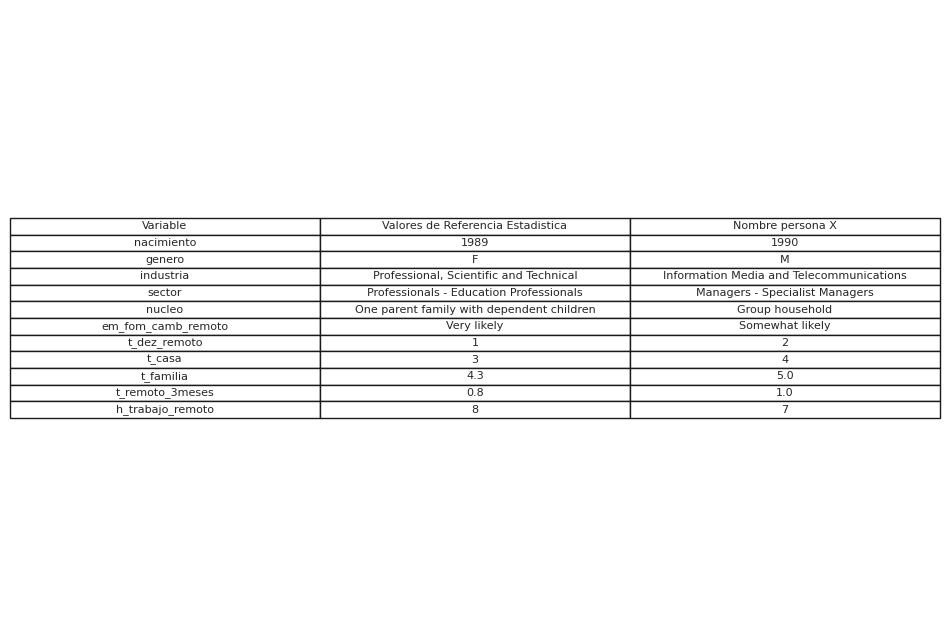

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para descategorizar
def descategorizar(datos_ref):
    # Mapeo de posiciones a diccionarios
    mapeo = {
        1: genero_dict,
        2: industria_dict,
        3: sector_dict,
        4: nucleo_dict,
        5: em_fom_camb_remoto_dict
    }

    # Descategorización
    datos_descategorizados = []
    for fila in datos_ref:
        fila_descategorizada = []
        for i, valor in enumerate(fila):
            if i in mapeo:
                fila_descategorizada.append(mapeo[i].get(valor, valor))
            else:
                fila_descategorizada.append(valor)
        datos_descategorizados.append(fila_descategorizada)

    return datos_descategorizados

# Nombres de las variables
nombres_variables = [
    'nacimiento', 'genero', 'industria', 'sector', 'nucleo',
    'em_fom_camb_remoto', 't_dez_remoto', 't_casa', 't_familia',
    't_remoto_3meses', 'h_trabajo_remoto'
]

# Array de referencia
array_referencia = [1989, 2, 14, 29, 5, 4, 1, 3, 4.3, 0.8, 8]

# Arrays recuperados de la base de datos (ejemplo)
arrays_recuperados = [[1990, 1, 10, 25, 3, 2, 2, 4, 5.0, 1.0, 7]]

# Descategorizar los arrays
datos_descategorizados_ref = descategorizar([array_referencia])[0]
datos_descategorizados_recuperados = descategorizar(arrays_recuperados)

# Crear DataFrame para la comparación
df_comparacion = pd.DataFrame({
    'Variable': nombres_variables,
    'Valores de Referencia Estadistica': datos_descategorizados_ref
})

for i, array in enumerate(datos_descategorizados_recuperados):
    df_comparacion[f'Nombre persona X'] = array

# Mostrar la tabla
print(df_comparacion)

# Crear una gráfica de la tabla
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
tabla = ax.table(cellText=df_comparacion.values, colLabels=df_comparacion.columns, cellLoc='center', loc='center')

plt.show()


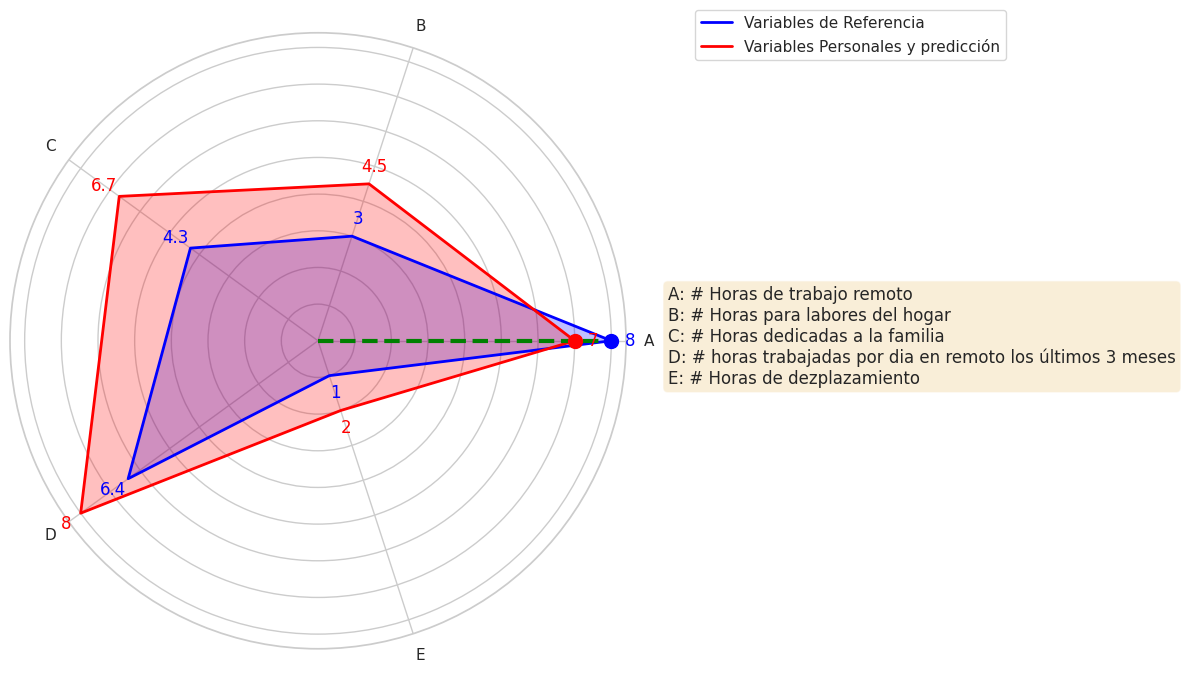

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Función para graficar los datos
def graficar_datos(values1, values2):

    values1 = values1[0][-5:]         # Extraer las últimas 5 posiciones
    values2 = values2[0][-5:]         # Extraer las últimas 5 posiciones
    values1[-2] = (values1[-2] * 8)   # Convertir la penúltima variable a un porcentaje de 0 a 8
    values2[-2] = (values2[-2] * 8)   # Convertir la penúltima variable a un porcentaje de 0 a 8
    values1[0], values1[-1] = values1[-1], values1[0]   # Intercambiar
    values2[0], values2[-1] = values2[-1], values2[0]   # Intercambiar

    labels = ['A', 'B', 'C', 'D', 'E']    # Etiquetas de las 5 puntas y sus descripciones
    descriptions = [
         '# Horas de trabajo remoto','# Horas para labores del hogar',
        '# Horas dedicadas a la familia', '# horas trabajadas por dia en remoto los últimos 3 meses', '# Horas de dezplazamiento'
    ]

    num_vars = len(labels)

    # Datos del primer polígono cerrado
    values1 += values1[:1]  # Cerrar el polígono

    # Datos del segundo polígono cerrado
    values2 += values2[:1]  # Cerrar el polígono

    # Ángulos de las puntas
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Dibujar el primer polígono
    ax.fill(angles, values1, color='blue', alpha=0.25)
    ax.plot(angles, values1, color='blue', linewidth=2, label='Variables de Referencia')

    # Dibujar el segundo polígono
    ax.fill(angles, values2, color='red', alpha=0.25)
    ax.plot(angles, values2, color='red', linewidth=2, label='Variables Personales y predicción')

    # Resaltar la letra "K"
    highlight_index = labels.index('A')
    ax.plot([angles[highlight_index], angles[highlight_index]], [0, max(values1[highlight_index], values2[highlight_index])], color='green', linewidth=3, linestyle='--')
    ax.scatter([angles[highlight_index]], [values1[highlight_index]], color='blue', s=100, zorder=10)
    ax.scatter([angles[highlight_index]], [values2[highlight_index]], color='red', s=100, zorder=10)

    # Añadir etiquetas de las letras
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Añadir los valores de cada punta
    for i in range(num_vars):
        ax.text(angles[i], values1[i] + 0.5, str(values1[i]), color='blue', ha='center', va='center')
        ax.text(angles[i], values2[i] + 0.5, str(values2[i]), color='red', ha='center', va='center')

    # Añadir leyenda para los polígonos
    ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05))

    # Crear la leyenda para las etiquetas
    legend_labels = [f'{label}: {desc}' for label, desc in zip(labels, descriptions)]
    legend_text = '\n'.join(legend_labels)

    # Añadir el recuadro de leyenda
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.gcf().text(0.95, 0.5, legend_text, fontsize=12, verticalalignment='center', bbox=props)

    plt.show()

# Datos de referencia
datos_ref = [[1989, 2, 14, 29, 5, 4, 1, 3, 4.3, 0.8, 8]]

# Datos personales y predicción (ejemplo)
datos_personales = [[1989, 2, 14, 29, 5, 4, 2, 4.5, 6.7, 1, 7]]

# Graficar los datos
graficar_datos(datos_ref, datos_personales)
